In [ ]:
# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
# Loading the data
# The second argument is fixing the parsing error

In [2]:
comments = pd.read_csv('/Users/ivanpavlovic/Data/UScomments.csv',error_bad_lines=False)

/var/folders/8p/vgv2x6vx0xxg77g7qqbd574h0000gn/T/ipykernel_53757/2961903141.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments = pd.read_csv('/Users/ivanpavlovic/Data/UScomments.csv',error_bad_lines=False)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/var/folders/8p/vgv2x6vx0xxg77g7qqbd574h0000gn/T/ipykernel_53757/2961903141.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv('/Users/ivanpavlovic/Data/UScomments.csv',error_bad_lines=False)


In [ ]:
# Checking whether there are any missing values

In [3]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [ ]:
# In case there are missing values and the number of them is not too high, we will remove them.

In [8]:
comments.dropna(inplace=True)

In [ ]:
# Two key things concepts for performing the polarity analysis are polarity and subjectivity.
# Their values are inside the range between -1 and +1. 
# TextBlob package helps with that

In [ ]:
# Installing the textblob package

In [9]:
!pip install textblob

In [10]:
from textblob import TextBlob

In [ ]:
# Testing the module

In [ ]:
TextBlob('trending').sentiment.polarity

In [ ]:
# To reduce the number of comments and ease the pressure on the CPU, we will display only the first 10000 comments 

In [ ]:
df = comments[0:10000]

In [ ]:
# Now, we will run a for loop and store our results in a polarity list.

In [ ]:
polarity = []
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [ ]:
# Displaying first 11 polarity values

In [ ]:
polarity[0:11]

In [ ]:
# Creating a dataframe

In [ ]:
comments['polarity'] = polarity

In [ ]:
# Displaying first 10 comments

In [26]:
comments.head(10)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [ ]:
# Defining positive and negative sentences - positive sentences have polarity value of 1 and the negative ones -1

In [ ]:
comments[comments['polarity'] == 1]

In [34]:
comments_positive = comments[comments['polarity'] == 1]

In [ ]:
comments_negative = comments[comments['polarity'] == -1]

In [ ]:
# To perform word cloud analysis, we will import word cloud module

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [27]:
comments_negative['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [ ]:
# Running the last line of code we are able to see that it is a one-dimensional pandas object called 'series'

In [ ]:
# In order to convert the series data into a string, we must use a built-in JOIN function.
# First we specify what will be a separator, and then we issue the command to join every row using the space as a separator

In [28]:
total_comments=' '.join(comments_negative['comment_text'])

In [29]:
total_comments[0:2500]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! Well… The brain surgeon Ben Carson just proved how truly insane he is… WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!! WTF BRUH!!!!!! cheeseus christ thats insane!!! this is the worst thing i've heard. ever. Economy is horrible in Cuba. It's going to be years before they get out of this. Sub to me if this is terrible PATHETIC I don't like this sportscaster  sounds very annoying commentators are awful This tv show became trump witch hunt tube... and frankly, boring. Arpaio should be arrested again for horribly butchering that song. This  show has become one-noted and pathetic. HARD CANDY!!!!!!!!!!! Tired of the philosophy add !!!!!!! boring 0:22   **laughs at terrible pun** Why is media even covering this disgusting woman anymore? How is this trending ? Awful a horrible attempt to try and get us to freak out this is one of the worst videos I've ever seen Whats with the horrible music? tf She 

In [ ]:
# Now you can see that the text is bundled together

In [ ]:
# Generating word cloud

In [30]:
# Stopwords are all the words that do not contribute to our analysis, so we must exclude them. In the first line of code, we are doing that.
# The fourth line of code is disabling an axis that could be created


In [ ]:
# Generating a beautiful word cloud analysis for the negative comments

(-0.5, 399.5, 199.5, -0.5)

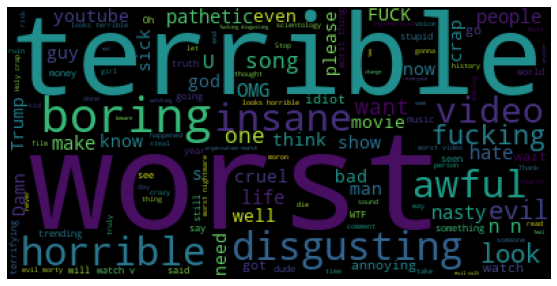

In [31]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
# Generating a word cloud analysis for the positive comments

In [36]:
total_comments2=' '.join(comments_positive['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

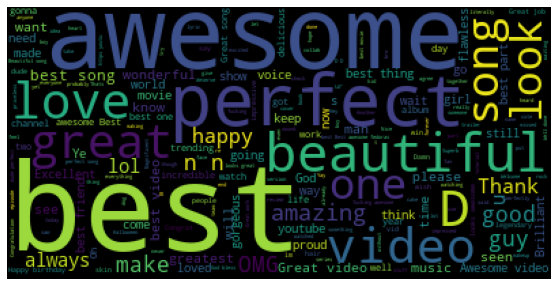

In [38]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments2)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')